In [ ]:
pip install pandas_profiling

In [6]:
#Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import joblib as jb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

import pandas_profiling as pf
import scipy.stats as stats
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel
from patsy import dmatrices
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ModuleNotFoundError: No module named 'pandas_profiling'

In [123]:
#importing the dataset
Data=pd.read_excel("C:\\Users\\Dell\\OneDrive\\Desktop\\firstapp\\PythonModelData.xlsx")

In [124]:
#creating Data Audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), 
                      x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),
                      x.quantile(0.50),x.quantile(0.75),x.quantile(0.90),x.quantile(0.95),
                      x.quantile(0.99),x.max()], 
                     index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [125]:
#creating Data Audit Report for categorical variables
def categorical_var_summary(x):
    Mode=x.values_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [126]:
#Missing Value imputation
def missing_imputation(x,stats='mean'):
    if (x.dtypes=='float64')|(x.dtypes=='int64'):
        x=x.fillna(x.mean()) if stats=='mean'  else x.fillna(x.median())
    else:
        x=x.fillna(x.mode())
    return x

In [127]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Type             183 non-null    object
 1   Syllabus         183 non-null    int64 
 2   Current Affairs  183 non-null    int64 
 3   NCERT            183 non-null    int64 
 4   Previous Years   183 non-null    int64 
 5   Reference Books  183 non-null    int64 
 6   Overlap          183 non-null    int64 
 7   Appeared         183 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 11.6+ KB


In [27]:
profile_report=pf.ProfileReport(Data)
profile_report.to_file("Data.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [128]:
numeric_var_names=[key for key in dict(Data.dtypes)
                   if dict(Data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(Data.dtypes)
                   if dict(Data.dtypes)[key] in ['object']]


In [129]:
Data.isnull().sum()

Type               0
Syllabus           0
Current Affairs    0
NCERT              0
Previous Years     0
Reference Books    0
Overlap            0
Appeared           0
dtype: int64

In [130]:
Data_num=Data[numeric_var_names]
Data_num

,Syllabus,Current Affairs,NCERT,Previous Years,Reference Books,Overlap,Appeared
0,1,1,1,1,0,0,0
1,1,1,4,1,1,0,0
2,0,2,1,1,0,0,0
3,1,1,1,1,1,0,0
4,1,2,1,1,1,0,0
...,...,...,...,...,...,...,...
178,1,2,1,1,0,0,0
179,1,2,2,1,0,0,0
180,1,5,4,1,0,0,1
181,1,5,4,2,0,0,1


In [131]:
num_summary=Data_num.apply(continuous_var_summary).T

In [132]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Syllabus,183.0,0.0,141.0,0.770492,1.0,0.421670,0.177806,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Current Affairs,183.0,0.0,505.0,2.759563,3.0,1.518061,2.304510,1.0,1.0,1.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,5.0
NCERT,183.0,0.0,444.0,2.426230,2.0,1.388244,1.927220,1.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0
Previous Years,183.0,0.0,272.0,1.486339,1.0,0.783469,0.613823,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0
Reference Books,183.0,0.0,68.0,0.371585,0.0,0.484554,0.234793,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Overlap,183.0,0.0,55.0,0.300546,0.0,0.459754,0.211373,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Appeared,183.0,0.0,104.0,0.568306,1.0,0.496671,0.246682,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [133]:
# Handling Outliers
Data_num=Data_num.apply(lambda x: x.clip(lower=x.dropna().quantile(0.01),upper=x.dropna().quantile(0.99)))

In [134]:
# Handling Missings
Data_num=Data_num.apply(lambda x:missing_imputation(x))

In [135]:
Data1=Data
Data1

,Type,Syllabus,Current Affairs,NCERT,Previous Years,Reference Books,Overlap,Appeared
0,A&C,1,1,1,1,0,0,0
1,A&C,1,1,4,1,1,0,0
2,A&C,0,2,1,1,0,0,0
3,A&C,1,1,1,1,1,0,0
4,A&C,1,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...
178,WH,1,2,1,1,0,0,0
179,WH,1,2,2,1,0,0,0
180,WH,1,5,4,1,0,0,1
181,WH,1,5,4,2,0,0,1


In [75]:
#def create_dummies2(df,colname):
   # type=LabelEncoder()
   # df.Type=type.fit_transform(df.Type)
   # ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])],remainder='passthrough')
   # df1=ct.fit_transform(df)
   # return df1

In [76]:
#for c_features in cat_var_names:
  #  Data1=create_dummies2(Data1,c_features)
#Data1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [136]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    #col_dummies.drop(col_dummies.columns[6],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [137]:
for c_features in cat_var_names:
    Data=create_dummies(Data,c_features)

In [138]:
Data.columns

Index(['Syllabus', 'Current Affairs', 'NCERT', 'Previous Years',
       'Reference Books', 'Overlap', 'Appeared', 'Type_A&C', 'Type_Env',
       'Type_HG', 'Type_Mod', 'Type_PG', 'Type_Soc', 'Type_WH'],
      dtype='object')

In [139]:
X=Data.columns.difference(["Appeared"])
Y="Appeared"

In [142]:
Data[X].head()

,Current Affairs,NCERT,Overlap,Previous Years,Reference Books,Syllabus,Type_A&C,Type_Env,Type_HG,Type_Mod,Type_PG,Type_Soc,Type_WH
0,1,1,0,1,0,1,1,0,0,0,0,0,0
1,1,4,0,1,1,1,1,0,0,0,0,0,0
2,2,1,0,1,0,0,1,0,0,0,0,0,0
3,1,1,0,1,1,1,1,0,0,0,0,0,0
4,2,1,0,1,1,1,1,0,0,0,0,0,0


In [143]:
Data[Y].head()

0    0
1    0
2    0
3    0
4    0
Name: Appeared, dtype: int64

In [144]:
X=Data[X]
y=Data[Y]

In [145]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=1)
logreg=LogisticRegression()
logreg.fit(train_X,train_y)
logreg.score(test_X,test_y)

0.8909090909090909

In [146]:
svm=SVC()
svm.fit(train_X,train_y)
svm.score(test_X,test_y)

0.9454545454545454

In [147]:
rf=RandomForestClassifier(n_estimators=40)
rf.fit(train_X,train_y)
rf.score(test_X,test_y)

0.9636363636363636

In [148]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [149]:
def getscore(model,train_X,test_X,train_y,test_y):
    model.fit(train_X,train_y)
    return model.score(test_X,test_y)

In [150]:
X = np.array(X)
y = np.array(y)

In [151]:
scores_l=[]
scores_svm=[]
scores_rf=[]

for train_index,test_index in kf.split(X):
    train_X,test_X,train_y,test_y=X[train_index],X[test_index],\
                                  y[train_index],y[test_index]
    scores_l.append(getscore(LogisticRegression(),train_X,test_X,train_y,test_y))
    scores_svm.append(getscore(SVC(),train_X,test_X,train_y,test_y)) 
    scores_rf.append(getscore(RandomForestClassifier(),train_X,test_X,train_y,test_y))

In [158]:
scores_l

[0.6756756756756757,
 0.8378378378378378,
 0.8378378378378378,
 0.8333333333333334,
 0.8611111111111112]

In [155]:
scores_svm

[0.7027027027027027,
 0.9459459459459459,
 0.8378378378378378,
 0.8611111111111112,
 0.8055555555555556]

In [159]:
scores_rf

[0.7297297297297297,
 0.6216216216216216,
 0.8108108108108109,
 0.9444444444444444,
 0.8888888888888888]

In [94]:
#Feature_Selection

In [160]:
Data.head()

,Syllabus,Current Affairs,NCERT,Previous Years,Reference Books,Overlap,Appeared,Type_A&C,Type_Env,Type_HG,Type_Mod,Type_PG,Type_Soc,Type_WH
0,1,1,1,1,0,0,0,1,0,0,0,0,0,0
1,1,1,4,1,1,0,0,1,0,0,0,0,0,0
2,0,2,1,1,0,0,0,1,0,0,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,0,0,0,0
4,1,2,1,1,1,0,0,1,0,0,0,0,0,0


In [161]:
X=Data.columns.difference(["Appeared"])
Y="Appeared"

In [162]:
X=Data[X]
y=Data[Y]

In [163]:
embeded_lr_selector = SelectFromModel(LogisticRegression(), max_features=5)
embeded_lr_selector.fit(X, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(embeded_lr_feature)

['Current Affairs', 'Overlap', 'Previous Years', 'Syllabus', 'Type_Env']


In [164]:
X1=Data[['Current Affairs', 'Overlap', 'Previous Years', 'Syllabus', 'Type_Env']]

In [165]:
X1 = np.array(X1)
y = np.array(y)

In [166]:
scores_l=[]
scores_svm=[]
scores_rf=[]

for train_index,test_index in kf.split(X1):
    train_X,test_X,train_y,test_y=X1[train_index],X1[test_index],\
                                  y[train_index],y[test_index]
    scores_l.append(getscore(LogisticRegression(),train_X,test_X,train_y,test_y))
    scores_svm.append(getscore(SVC(),train_X,test_X,train_y,test_y)) 
    scores_rf.append(getscore(RandomForestClassifier(),train_X,test_X,train_y,test_y))

In [167]:
scores_l

[0.7837837837837838,
 0.9459459459459459,
 0.8648648648648649,
 0.9444444444444444,
 0.8888888888888888]

In [168]:
scores_svm

[0.8648648648648649,
 0.972972972972973,
 0.8648648648648649,
 0.9444444444444444,
 0.8611111111111112]

In [169]:
scores_rf

[0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649,
 0.9166666666666666,
 0.8333333333333334]

In [170]:
#RFE- Recursive Feauture Elimination

In [171]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe.fit(X,y)
rfe_support = rfe.get_support()
print(rfe.support_)
print(rfe.ranking_)
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(rfe_feature)

[ True False  True  True False  True False  True False False False False
 False]
[1 2 1 1 9 1 5 1 8 4 7 3 6]
['Current Affairs', 'Overlap', 'Previous Years', 'Syllabus', 'Type_Env']


In [172]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X1, y, test_size=0.30, random_state=5)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 90.91%


In [173]:
from sklearn.model_selection import train_test_split
kfold = model_selection.KFold(n_splits=5)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X1, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 88.56%


In [174]:
from sklearn.model_selection import StratifiedKFold

In [175]:
skfold = StratifiedKFold(n_splits=6)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X1, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 87.49%


In [176]:
print(model.coef_, model.intercept_)

[[ 0.7769152   0.62056192  2.14745476  2.59479012 -1.07870403]] [-6.44128154]


In [177]:
#Using Extra Tree Classifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [178]:
print(model.feature_importances_)

[0.26216672 0.17067388 0.0527253  0.18364297 0.02651391 0.13436355
 0.02662632 0.02937299 0.03134131 0.0285427  0.01820562 0.02372229
 0.01210244]


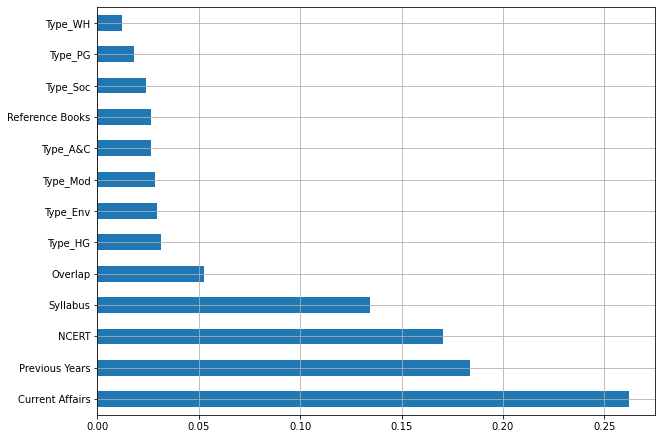

In [179]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(14).plot(kind='barh')
plt.show()

In [180]:
X2=Data[['Current Affairs', 'NCERT', 'Previous Years', 'Syllabus', 'Overlap']]

In [181]:
X2 = np.array(X2)
y = np.array(y)

In [182]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X2, y, test_size=0.30, random_state=2)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 92.73%


In [183]:
from sklearn.model_selection import train_test_split
kfold = model_selection.KFold(n_splits=5)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X2, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 85.26%


In [184]:
skfold = StratifiedKFold(n_splits=6)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X2, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 86.40%


In [185]:
print(model.coef_, model.intercept_)

[[1.12138612 0.67045003 2.01109139 1.65603169 0.34408854]] [-7.93735801]


# EXPORT MODEL


In [188]:

jb.dump(logreg,'Predictor')

['Predictor']